<a href="https://colab.research.google.com/github/thanachai-npr/CE888/blob/main/Lab_8/FT_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [2]:
# Make new base directory
import os
base_dir = '/content/cats_dogs_humans_horses_classification'
os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
#Count images of horses
path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print(file_count)

202


In [5]:
#Count images of cats
path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print(file_count)

202


In [6]:
#Count images of humans
path, dirs, files = next(os.walk("/content/data/Humans"))
file_count = len(files)
print(file_count)

202


In [7]:
#Count images of dogs
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print(file_count)

202


In [8]:
#Divide data into train test and validation  //Ratio 60:20:20
import shutil
fnames = ['cat.{}.jpg'.format(i+1) for i in range(122)]
for fname in fnames:
  src = os.path.join('/content/data/cats', fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i+1) for i in range(122, 162)]
for fname in fnames:
  src = os.path.join('/content/data/cats', fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i+1) for i in range(162, 202)]
for fname in fnames:
  src = os.path.join('/content/data/cats', fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i+1) for i in range(122)]
for fname in fnames:
  src = os.path.join('/content/data/dogs', fname)
  dst = os.path.join(train_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i+1) for i in range(122, 162)]
for fname in fnames:
  src = os.path.join('/content/data/dogs', fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i+1) for i in range(162, 202)]
for fname in fnames:
  src = os.path.join('/content/data/dogs', fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['horse-{}.jpg'.format(i+1) for i in range(122)]
for fname in fnames:
  src = os.path.join('/content/data/horses', fname)
  dst = os.path.join(train_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i+1) for i in range(122, 162)]
for fname in fnames:
  src = os.path.join('/content/data/horses', fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i+1) for i in range(162, 202)]
for fname in fnames:
  src = os.path.join('/content/data/horses', fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i+1) for i in range(122)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i+1) for i in range(122, 162)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i+1) for i in range(162, 202)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [10]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label_2 = img.split('-')[0]
    if word_label == 'dog': return 3
    elif word_label == 'cat': return 2
    elif word_label_2 == 'rider': return 1
    elif word_label_2 == 'horse': return 0

In [11]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [12]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [14]:
## MobileNet
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [24]:
model = MobileNet(
  input_shape=None,
  include_top=True,
  weights="imagenet",
  input_tensor=img_input,
  pooling=None,
  classes=1000,
  classifier_activation="softmax"
)
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [26]:
last_layer = model.get_layer('global_average_pooling2d_1').output
x = Dense(128, activation='relu', name='fc1')(last_layer)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 4 classes
model = Model(img_input, out)
for layer in model.layers[:-3]:
	layer.trainable = False
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='mobilenet_model.h5', save_best_only=True),
]

In [29]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
49/49 [==============================] - 4s 50ms/step - loss: 0.7727 - acc: 0.6825 - val_loss: 0.0313 - val_acc: 0.9875
Epoch 2/10
49/49 [==============================] - 2s 36ms/step - loss: 0.0591 - acc: 0.9816 - val_loss: 0.0421 - val_acc: 0.9875
Epoch 3/10
49/49 [==============================] - 2s 36ms/step - loss: 0.0158 - acc: 0.9915 - val_loss: 0.0164 - val_acc: 0.9937
Epoch 4/10
49/49 [==============================] - 2s 36ms/step - loss: 0.0111 - acc: 0.9956 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 5/10
49/49 [==============================] - 2s 36ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0108 - val_acc: 0.9937
Epoch 6/10
49/49 [==============================] - 2s 36ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 0.9937
Epoch 7/10
49/49 [==============================] - 2s 36ms/step - loss: 7.2960e-04 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 0.9937
Epoch 8/10
49/49 [==============================] - 2s 36ms/step - loss: 5.0458

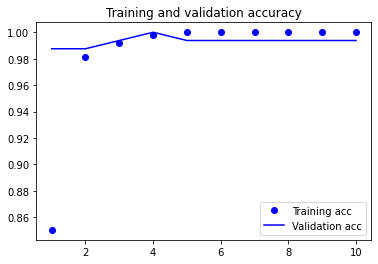

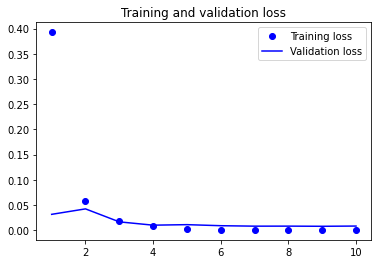

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

## Test Accuracy
predictions = model.predict(test_X)
test_label = np.argmax(predictions,axis=1)
test_acc = accuracy_score(test_y, test_label)

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, test_label, average='micro')


print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 1.0
Val Accuracy:	 0.9937499761581421
Test Accuracy:	 0.98125
Precision:	 0.98125
Recall:		 0.98125
F1 Score:	 0.98125
